# Geopandas and GeoDataFrame


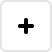
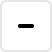
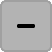
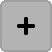
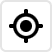
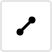
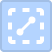
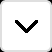
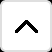
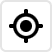
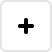
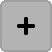
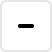
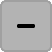
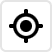
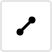
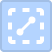
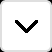
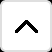
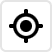

In [1]:
import pandas as pd
from geopandas import GeoDataFrame
from lets_plot import *
from shapely.geometry import MultiPolygon, Polygon, LinearRing, Point, MultiPoint, LineString, MultiLineString, mapping

LetsPlot.setup_html()

### Let's draw GeoDataFrame on plot

In [2]:
POINT = Point(-5, 17)

MULTI_POINT = MultiPoint([Point(3, 15), Point(6, 13)])

LINE = LineString([(0, 0), (5, 5)])

MULTI_LINE = MultiLineString([
    LineString([(10, 0), (15, 5)]),
    LineString([(10, 5), (15, 0)])
])

POLYGON = Polygon(
    LinearRing([(1, 1), (1, 9), (9, 9), (9, 1)]),
    [LinearRing([(2, 2), (3, 2), (3, 3), (2, 3)]),
     LinearRing([(4, 4), (6, 4), (6, 6), (4, 6)])]
)

MULTIPOLYGON = MultiPolygon([
    Polygon(LinearRing([(11, 12), (13, 14), (15, 13), (7, 4)])),
    Polygon(LinearRing([(10, 2), (13, 10), (12, 3)]))
])

In [3]:
gdf = GeoDataFrame(
    data={
        'key': ['A', 'B', 'C', 'A', 'B', 'C'],
        'kind': ['Point', 'MPoint', 'Line', 'MLine', 'Polygon', 'MPolygon'],
        'coord': [POINT, MULTI_POINT, LINE, MULTI_LINE, POLYGON, MULTIPOLYGON]
    },
    geometry='coord'
)

### Geom kinds that support GeoDataFrame

#### geom_polygon()
GeoDataFrame is supported natively in the 'data' parameter. Geometries of shapes Polygon and MultiPolygon are automatically taken from GeoDataFrame for geom_polygon().

In [4]:
ggplot() + geom_polygon(aes(fill='kind'), data=gdf)

GeoDataFrame can be used in the 'map' parameter (without 'data' specified). Geometries of shapes Polygon and MultiPolygon are automatically taken from GeoDataFrame for geom_polygon().

In [5]:
ggplot() + geom_polygon(map=gdf)

The data specified in the 'data' and geometries from the 'map' can be joined by a key value from 'map_id' aesthetic.

In [6]:
df = pd.DataFrame({
    'name': ['A', 'B', 'C'],
    'value': [42, 23, 87],
})

In [7]:
ggplot() + geom_polygon(aes(fill='value'), data=df, map=gdf, map_join=['name', 'key'])

#### geom_point() and geom_text()

GeoDataFrame is supported natively in the 'data' parameter for geom_point() and geom_text(). Geometries of shapes Point and MultiPoint are automatically taken from GeoDataFrame. 


In [8]:
ggplot() + geom_point(aes(color='kind'), data=gdf, size=10) + \
    geom_text(aes(label='kind'), data=gdf, angle=25)

In [9]:
ggplot() + geom_text(aes(label='key', color='kind'), data=gdf)

GeoDataFrame can be used in the 'map' parameter (without 'data' specified). Geometries of shapes Point and MultiPoint are automatically taken from GeoDataFrame for geom_point().

In [10]:
ggplot() + geom_point(map=gdf, size=10)

The data specified in the 'data' and geometries from the 'map' can be joined by a pair of keys from 'map_join' param.

In [11]:
ggplot() + geom_point(aes(color='value'), data=df, map=gdf, size=10, map_join=['name','key'])

#### geom_rect()

GeoDataFrame is supported natively in the 'data' parameter of geom_rect(). Geometries of shapes MultiPoint, Line, MultiLine, Polygon and MultiPolygon are automatically taken from GeoDataFrame, their bounding boxes will be drawn. 

In [12]:
ggplot() + geom_rect(aes(fill='kind'), data=gdf)

GeoDataFrame can be used in the 'map' parameter. Geometries of shapes MultiPoint, Line, MultiLine, Polygon and MultiPolygon are automatically taken from GeoDataFrame for geom_rect(), their bounding boxes will be drawn. 

In [13]:
ggplot() + geom_rect(map=gdf)

The data specified in the 'data' and geometries from the 'map' can be joined by a pair of keys from 'map_join' param.

In [14]:
ggplot() + geom_rect(aes(fill='value'), data=df, map=gdf, map_join=['name', 'key'])

#### geom_path()

GeoDataFrame is supported natively in the 'data' parameter for geom_path(). Geometries of shapes Line and MultiLine are automatically taken from GeoDataFrame.


In [15]:
ggplot() + geom_path(aes(color='kind'), data=gdf)

Can be used in the 'map' parameter for geom_path() without specifying 'data'.

In [16]:
ggplot() + geom_path(map=gdf)

The data specified in the 'data' and geometries from the 'map' can be joined by a pair of keys from 'map_join' param.

In [17]:
ggplot() + geom_path(aes(color='value'), data=df, map=gdf, map_join=['name', 'key'])

#### geom_map()

GeoDataFrame is supported natively in the 'data' parameter of geom_map(). Geometries of shapes Polygon and MultiPolygon are automatically taken from GeoDataFrame. 


In [18]:
ggplot() + geom_map(aes(color='kind'), data=gdf, size=1)

Can be used in the 'map' parameter for geom_map().

In [19]:
ggplot() + geom_map(map=gdf)

The data specified in the 'data' and geometries from the 'map' can be joined by a pair of keys from 'map_join' param.

In [20]:
ggplot() + geom_map(aes(fill='value'), data=df, map=gdf, map_join=['name', 'key'])

In [26]:
data = {
    "fruit": ["Apple", "Apple", "Orange", "Orange"],
    "values": [4.0, 16.0, 6.0, 9.0],
    "nutrients": ["Fiber", "Carbs", "Fiber", "Carbs"]
}

p1 = Point(11, 22)
p2 = Point(33, 44)

gdf = GeoDataFrame(
    data={
        'name': ['Orange', 'Apple'],
        'coord': [p1, p2]
    },
    geometry='coord'
)

pie = geom_pie(aes(x='fruit', weight='values', fill='nutrients'), map=gdf, map_join=['fruit', 'name'])
gggrid([
    ggplot(data) + pie,
    ggplot(data) + geom_livemap() + pie
])